In [37]:
import numpy as np
import pandas as pd


In [38]:
df = pd.read_csv("Churn_Modelling.csv")

In [39]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
df.shape

(10000, 14)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [42]:
df.duplicated().sum()

0

In [43]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [44]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [45]:
df["Gender"].value_counts()  

Male      5457
Female    4543
Name: Gender, dtype: int64

In [46]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace= True)

In [47]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [48]:
# Lets do one hot encoding for the categorical column
# Very useful function in pandas to get the one hot encoding of the categorical column
df = pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [49]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [50]:
# We need to scale the larger values before giving to the nerual network
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Exited"])
y = df["Exited"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [51]:
X 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [52]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [53]:
X_train.shape

(8000, 11)

In [54]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9953,550,47,2,0.00,2,1,1,97057.28,0,0,1
3850,680,34,3,143292.95,1,1,0,66526.01,0,0,1
4962,531,42,2,0.00,2,0,1,90537.47,0,0,0
3886,710,34,8,147833.30,2,0,1,1561.58,1,0,1
5437,543,30,6,73481.05,1,1,1,176692.65,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3919,763,39,7,0.00,2,1,0,19458.75,0,1,0
162,800,49,7,108007.36,1,0,0,47125.11,0,0,0
7903,567,34,10,0.00,2,0,1,161571.79,0,1,1
2242,621,30,2,101014.08,2,1,1,165257.31,1,0,0


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [56]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [58]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [59]:
model = Sequential()

In [60]:
# Neural Nertwork Architecture: 1 input layer, 1 hidden layer and 1 output layer

In [61]:
# model.add(Dense(3,activation="sigmoid",input_dim=11)) #hidden layer with 11 input features
# model.add(Dense(1,activation='sigmoid'))

In [62]:
model.add(Dense(11,activation="relu",input_dim=11)) #hidden layer with 11 input features
model.add(Dense(11,activation="relu"))
model.add(Dense(1,activation='sigmoid'))

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
# before the model is ready to be trained, you need to configure additional settings for the training process. 
#. The compile() : optimizer, loss funcrion and the metrics such as (accuracy, precision and recall)
model.compile(loss='binary_crossentropy',optimizer="Adam",metrics=["accuracy"])   # For defining the model configuration

In [65]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 0s 553us/step - loss: 0.5194 - accuracy: 0.7833 - val_loss: 0.4760 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 367us/step - loss: 0.4493 - accuracy: 0.8006 - val_loss: 0.4489 - val_accuracy: 0.8025
Epoch 3/100
200/200 [==============================] - 0s 387us/step - loss: 0.4298 - accuracy: 0.8158 - val_loss: 0.4339 - val_accuracy: 0.8131
Epoch 4/100
200/200 [==============================] - 0s 357us/step - loss: 0.4172 - accuracy: 0.8242 - val_loss: 0.4194 - val_accuracy: 0.8225
Epoch 5/100
200/200 [==============================] - 0s 356us/step - loss: 0.4015 - accuracy: 0.8331 - val_loss: 0.4020 - val_accuracy: 0.8344
Epoch 6/100
200/200 [==============================] - 0s 352us/step - loss: 0.3861 - accuracy: 0.8419 - val_loss: 0.3878 - val_accuracy: 0.8431
Epoch 7/100
200/200 [==============================] - 0s 351us/step - loss: 0.3745 - accuracy: 0.8494 - val_loss: 0.3772 - val_ac

200/200 [==============================] - 0s 336us/step - loss: 0.3274 - accuracy: 0.8631 - val_loss: 0.3489 - val_accuracy: 0.8481
Epoch 58/100
200/200 [==============================] - 0s 337us/step - loss: 0.3276 - accuracy: 0.8644 - val_loss: 0.3492 - val_accuracy: 0.8500
Epoch 59/100
200/200 [==============================] - 0s 338us/step - loss: 0.3276 - accuracy: 0.8630 - val_loss: 0.3476 - val_accuracy: 0.8487
Epoch 60/100
200/200 [==============================] - 0s 337us/step - loss: 0.3276 - accuracy: 0.8630 - val_loss: 0.3498 - val_accuracy: 0.8494
Epoch 61/100
200/200 [==============================] - 0s 336us/step - loss: 0.3276 - accuracy: 0.8631 - val_loss: 0.3494 - val_accuracy: 0.8506
Epoch 62/100
200/200 [==============================] - 0s 335us/step - loss: 0.3274 - accuracy: 0.8628 - val_loss: 0.3502 - val_accuracy: 0.8506
Epoch 63/100
200/200 [==============================] - 0s 335us/step - loss: 0.3271 - accuracy: 0.8627 - val_loss: 0.3482 - val_accuracy

In [66]:
# To get the values of the caluclated weights and baises during the training of the neural network
model.layers[0].get_weights()  # weights and biases for the first layer

[array([[ 0.5423262 ,  0.06489155, -0.17072247, -0.00675139,  0.27268624,
          0.25462577,  0.12732796,  0.35716859, -0.18719965,  0.05814283,
         -0.3289832 ],
        [-0.19855775,  0.2159696 ,  0.84983075, -0.22827677,  0.09876098,
          0.31041014,  0.37667048, -0.7758967 , -0.8729966 , -0.6516531 ,
          0.69474447],
        [-0.47453347,  0.32036826,  0.11355777,  0.22747736,  0.09763625,
          0.02376425,  0.00541433,  0.1318969 ,  0.05483131,  0.06477765,
          0.13722874],
        [-0.43314326,  0.06476354, -0.04101437,  0.38895306, -0.25574672,
         -0.6790261 ,  0.5865282 ,  0.2573715 , -0.6033488 ,  0.35968447,
         -0.44811806],
        [-0.00417464,  0.34259734,  1.3085247 ,  1.2924829 ,  0.18470867,
         -0.18396002,  0.1759224 , -0.01162776,  0.18288767,  0.17135403,
         -0.50351286],
        [-0.00258546,  0.2521914 ,  0.05140059, -0.15464777, -0.659331  ,
         -0.18184188,  0.03972889, -0.19989127,  0.21490815, -0.0909028

In [67]:
model.layers[1].get_weights()  # Weights and biases for the second layer

[array([[-0.0969052 ,  0.09336761,  0.2971519 ,  0.5883557 ,  0.34467047,
          0.5260059 ,  0.2384526 ,  0.15222391,  0.25166813, -0.06108391,
          0.47190616],
        [ 0.7284991 , -0.02223299,  0.3808334 , -0.19778948,  0.5733352 ,
          0.35860798,  0.39962977,  0.478061  ,  0.00507862,  0.24353689,
         -0.40999526],
        [-0.04825759,  0.8319978 ,  0.12494367,  0.37857744,  0.2232001 ,
         -0.17341742,  0.23881605, -0.00533311, -1.6989741 , -1.7181628 ,
         -0.46690372],
        [-0.13207117,  0.96974933,  0.28554514,  0.05486634, -0.11457215,
          0.09693774, -0.02377102, -0.08797371, -0.34014136, -0.9074477 ,
          0.47739542],
        [-0.14944494, -0.0897544 ,  0.20075057, -0.7085705 ,  0.5178983 ,
          0.46456987,  0.20979577, -0.37438208,  0.2906848 , -0.14608586,
         -0.56491625],
        [ 0.11415058,  0.28464493, -0.6538455 , -0.297743  , -0.41177708,
          0.08201686, -0.1656675 , -0.13845162,  0.5964869 ,  0.4391474

In [68]:
# The value of the weihjts and biases are stored ionto this model lyaer

model.layers

In [69]:
model.predict(X_test_scaled)  # you will get the output between 0 to 1 as we are usiing the sigmoid activation bfunction]


63/63 [==============================] - 0s 230us/step


array([[0.01281676],
       [0.12351552],
       [0.02415099],
       ...,
       [0.00751391],
       [0.06191112],
       [0.63692874]], dtype=float32)

In [70]:
# To convert these probabiliteis into zeros and ones we need to decide the threshold to do that we need to plot the AUC and ROC curves
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 213us/step


In [71]:
y_pred = np.where(y_log>0.5,1,0)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.856

In [73]:
history

In [74]:
history.history

{'loss': [0.5193940997123718,
  0.44930827617645264,
  0.4297989308834076,
  0.41717520356178284,
  0.40153586864471436,
  0.3860502243041992,
  0.3745015859603882,
  0.3657815456390381,
  0.3594210743904114,
  0.35485413670539856,
  0.3510761559009552,
  0.3485446870326996,
  0.34632113575935364,
  0.34444472193717957,
  0.3431137502193451,
  0.3416147530078888,
  0.34060192108154297,
  0.3398011326789856,
  0.33901897072792053,
  0.33818957209587097,
  0.337558388710022,
  0.3370492458343506,
  0.3363970220088959,
  0.3357972800731659,
  0.33578068017959595,
  0.33492958545684814,
  0.3348996341228485,
  0.33443477749824524,
  0.33440983295440674,
  0.3336649239063263,
  0.33307158946990967,
  0.33312442898750305,
  0.33302372694015503,
  0.3325182795524597,
  0.3319680094718933,
  0.33178597688674927,
  0.3309745490550995,
  0.3312520980834961,
  0.3308296203613281,
  0.3307579755783081,
  0.3306168019771576,
  0.33032867312431335,
  0.329862505197525,
  0.3297935426235199,
  0.3292

In [76]:
import matplotlib.pyplot as plt

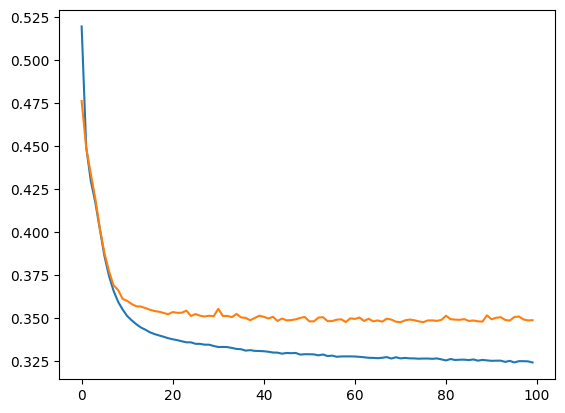

In [78]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [ ]:
plt.plot(history.history[""])